In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from scipy import stats
import calendar

<h1>Question 1</h1>

In [3]:
demand = pd.read_csv("EirGridSystemDemand2014.csv") # importing csv file

In [4]:
demand # visualizing dataframe

,Date,Time,Demand
0,1/1/2014,0:00,2899.0
1,1/1/2014,0:15,2869.0
2,1/1/2014,0:30,2827.0
3,1/1/2014,0:45,2787.0
4,1/1/2014,1:00,2724.0
...,...,...,...
35035,12/31/2014,22:45,2779.0
35036,12/31/2014,23:00,2876.0
35037,12/31/2014,23:15,2961.0
35038,12/31/2014,23:30,2957.0


In [5]:
# adding date and time to a new column "Datetime"
demand["Datetime"] = demand["Date"] + " "+demand["Time"]

In [6]:
# setting the "Datetime" column to datetime format %y-%m-%d
demand["Datetime"] = pd.to_datetime(demand["Datetime"])

In [7]:
# removing date and time columns because no longer needed
demand.drop(columns = ["Date", "Time"])

,Demand,Datetime
0,2899.0,2014-01-01 00:00:00
1,2869.0,2014-01-01 00:15:00
2,2827.0,2014-01-01 00:30:00
3,2787.0,2014-01-01 00:45:00
4,2724.0,2014-01-01 01:00:00
...,...,...
35035,2779.0,2014-12-31 22:45:00
35036,2876.0,2014-12-31 23:00:00
35037,2961.0,2014-12-31 23:15:00
35038,2957.0,2014-12-31 23:30:00


In [8]:
# rearranging columns
demand = demand[["Datetime", "Demand"]]

In [9]:
demand

,Datetime,Demand
0,2014-01-01 00:00:00,2899.0
1,2014-01-01 00:15:00,2869.0
2,2014-01-01 00:30:00,2827.0
3,2014-01-01 00:45:00,2787.0
4,2014-01-01 01:00:00,2724.0
...,...,...
35035,2014-12-31 22:45:00,2779.0
35036,2014-12-31 23:00:00,2876.0
35037,2014-12-31 23:15:00,2961.0
35038,2014-12-31 23:30:00,2957.0


In [10]:
# checking for NaN values
demand.isna().sum()

Datetime    0
Demand      5
dtype: int64

In [11]:
# checking columns where demand is unavailable due to daytime saving
demand[demand["Demand"].isna()]

,Datetime,Demand
8452,2014-03-30 01:00:00,NaN
8453,2014-03-30 01:15:00,NaN
8454,2014-03-30 01:30:00,NaN
8455,2014-03-30 01:45:00,NaN
21657,2014-08-14 14:15:00,NaN


In [12]:
# performing linear interpolation on NaN values for demand
demand = demand.interpolate(method = "linear")

In [13]:
# checking if NaN values are gone
demand.isna().sum()

Datetime    0
Demand      0
dtype: int64

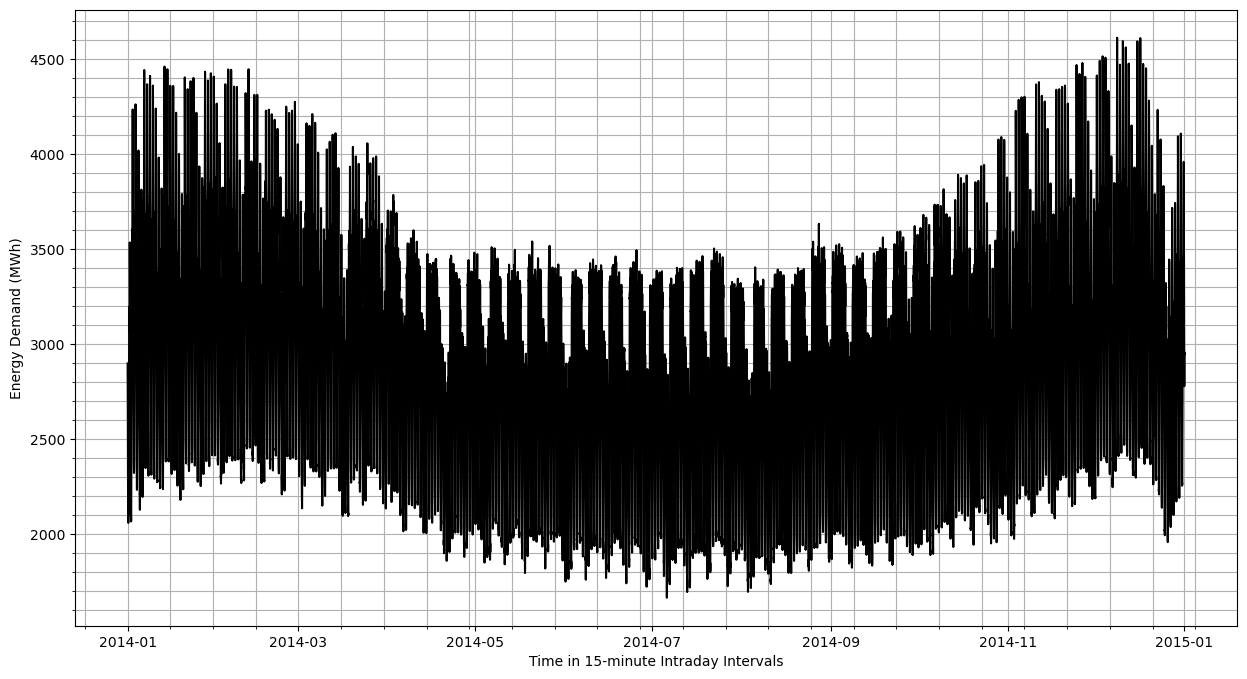

In [14]:
plt.rcParams["font.size"] = 10 # setting font size
plt.figure(figsize = (15, 8)) # setting figure size

plt.plot(demand["Datetime"], demand["Demand"], color = "black") # plotting x and y

plt.xlabel("Time in 15-minute Intraday Intervals") # labeling x-axis
plt.ylabel("Energy Demand (MWh)") # labeling y-axis

plt.grid(which = "both") # showing both major and minor grid
plt.minorticks_on() # showing minor ticks on x and y

plt.savefig("question1.png", dpi = 300)
plt.show() # showing plot

<h1>Question 2</h1>

In [16]:
# for a 10-day autocorrleation estimate, each data point is 15 minutes = 1/4 hours, so:
datapoints_to_10_days = 4 * 24 * 10
print(datapoints_to_10_days)

# range of lags is
lags = np.arange(datapoints_to_10_days + 1)
print(lags)

960
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 24

In [17]:
# autocorrelations can be calculated using pandas's autocorr() function

ten_day_demand_autocorrelations = [demand["Demand"].autocorr(lag) for lag in lags]

In [18]:
ten_day_demand_autocorrelations

[0.9999999999999998,
 0.9961026387552925,
 0.9856889963284434,
 0.9694483505645529,
 0.948212955517575,
 0.9224626457368109,
 0.892970834914204,
 0.8602786814674716,
 0.8248895670867259,
 0.7871320074646032,
 0.7474376005355359,
 0.706164729523193,
 0.6636373479062041,
 0.6200551578884654,
 0.5756255339608984,
 0.5305953201601052,
 0.48519577153255283,
 0.4396396687386631,
 0.39410476661098637,
 0.3487453311451184,
 0.30373355411072644,
 0.2592823466297027,
 0.21563966746791988,
 0.17302658226557377,
 0.1316509492178051,
 0.09169523777915767,
 0.053374811155583304,
 0.016777376805024127,
 -0.018026971558445924,
 -0.05101012177303271,
 -0.08197552053876056,
 -0.11091799785696016,
 -0.13793871219076145,
 -0.16321219591541905,
 -0.18664560591632726,
 -0.208251835288994,
 -0.22807738456787227,
 -0.24626032097552,
 -0.2628868863798494,
 -0.2780625776778898,
 -0.2918779932753407,
 -0.3044583455048024,
 -0.315847388759117,
 -0.3259470763007127,
 -0.33459937804707557,
 -0.34165636478738154,
 -

In [19]:
days = lags / (24 * 4) # changing 15 minute intervals to days for plotting

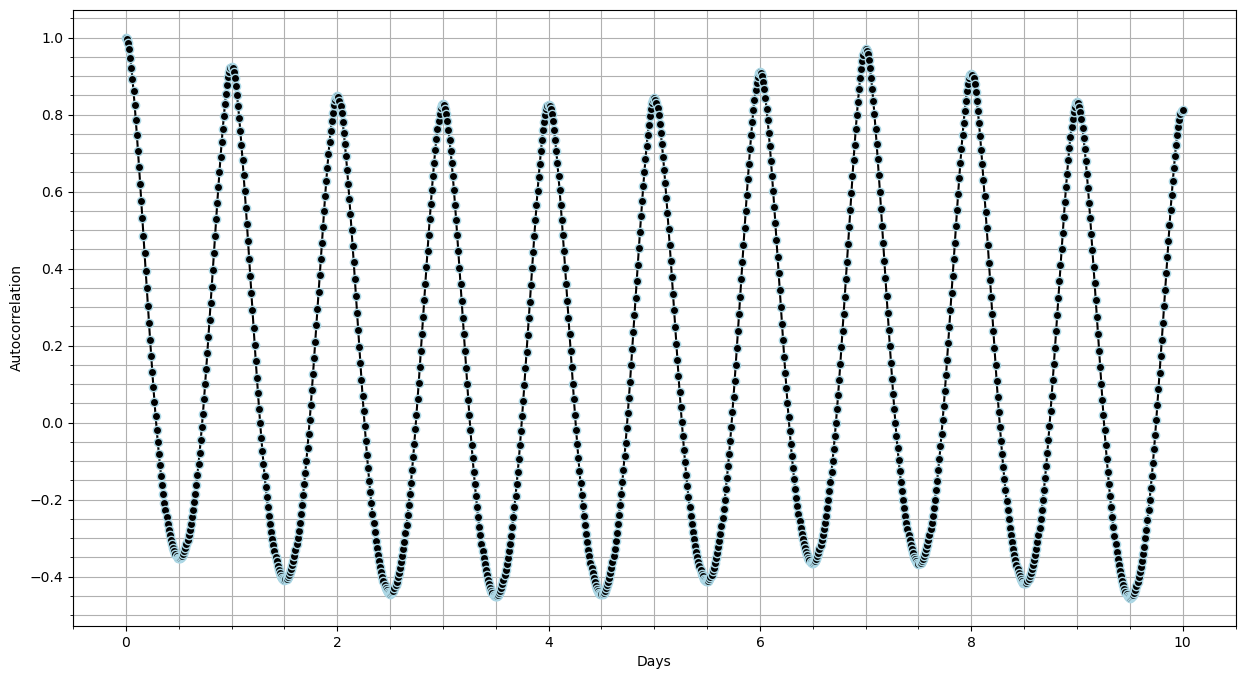

In [20]:
plt.rcParams["font.size"] = 10 # setting font size
plt.figure(figsize = (15, 8)) # setting figure size

# plotting days on x-axis and autocorrelations on y-axis with marker for each datapoint
plt.plot(days, ten_day_demand_autocorrelations, marker = "o", linestyle = "-", color = "black", markersize = "6", mec = "lightblue")

plt.grid(which = "both") # showing minor and major grid
plt.minorticks_on() # showing minor ticks on x and y

plt.xlabel("Days") # x-axis is in Days
plt.ylabel("Autocorrelation") # y-axis is the autocorrelation coefficienct

plt.savefig("question2.png", dpi = 300)
plt.show() # showing plot

In [21]:
demand

,Datetime,Demand
0,2014-01-01 00:00:00,2899.0
1,2014-01-01 00:15:00,2869.0
2,2014-01-01 00:30:00,2827.0
3,2014-01-01 00:45:00,2787.0
4,2014-01-01 01:00:00,2724.0
...,...,...
35035,2014-12-31 22:45:00,2779.0
35036,2014-12-31 23:00:00,2876.0
35037,2014-12-31 23:15:00,2961.0
35038,2014-12-31 23:30:00,2957.0


<h1>Question 3</h1>

In [23]:
# the methodology of creating a time of year variable is by first getting the day number in the year
# next, each day has 24 hours so moving from day to hour of day is by dividing by 24 and adding the minute fraction
# then, the time of year is the day of year + the fraction of the day / 365

In [24]:
demand["Day of Year"] = demand["Datetime"].dt.dayofyear # day of year number

In [25]:
demand

,Datetime,Demand,Day of Year
0,2014-01-01 00:00:00,2899.0,1
1,2014-01-01 00:15:00,2869.0,1
2,2014-01-01 00:30:00,2827.0,1
3,2014-01-01 00:45:00,2787.0,1
4,2014-01-01 01:00:00,2724.0,1
...,...,...,...
35035,2014-12-31 22:45:00,2779.0,365
35036,2014-12-31 23:00:00,2876.0,365
35037,2014-12-31 23:15:00,2961.0,365
35038,2014-12-31 23:30:00,2957.0,365


In [26]:
demand["Fraction of Day"] = demand["Datetime"].dt.hour / 24 + demand["Datetime"].dt.minute / (24 * 60) # fraction of day by hour and minute

In [27]:
demand.describe()

,Datetime,Demand,Day of Year,Fraction of Day
count,35040,35040.000000,35040.000000,35040.000000
mean,2014-07-02 11:52:30,2943.349229,183.000000,0.494792
min,2014-01-01 00:00:00,1665.000000,1.000000,0.000000
25%,2014-04-02 05:56:15,2426.000000,92.000000,0.247396
50%,2014-07-02 11:52:30,3014.000000,183.000000,0.494792
75%,2014-10-01 17:48:45,3378.000000,274.000000,0.742188
max,2014-12-31 23:45:00,4614.000000,365.000000,0.989583
std,NaN,599.623229,105.367532,0.288664


In [28]:
demand["Time of Year Variable"] =  (demand["Day of Year"] + demand["Fraction of Day"] - 1) / 365 # total = day number + fraction of day

In [29]:
demand

,Datetime,Demand,Day of Year,Fraction of Day,Time of Year Variable
0,2014-01-01 00:00:00,2899.0,1,0.000000,0.000000
1,2014-01-01 00:15:00,2869.0,1,0.010417,0.000029
2,2014-01-01 00:30:00,2827.0,1,0.020833,0.000057
3,2014-01-01 00:45:00,2787.0,1,0.031250,0.000086
4,2014-01-01 01:00:00,2724.0,1,0.041667,0.000114
...,...,...,...,...,...
35035,2014-12-31 22:45:00,2779.0,365,0.947917,0.999857
35036,2014-12-31 23:00:00,2876.0,365,0.958333,0.999886
35037,2014-12-31 23:15:00,2961.0,365,0.968750,0.999914
35038,2014-12-31 23:30:00,2957.0,365,0.979167,0.999943


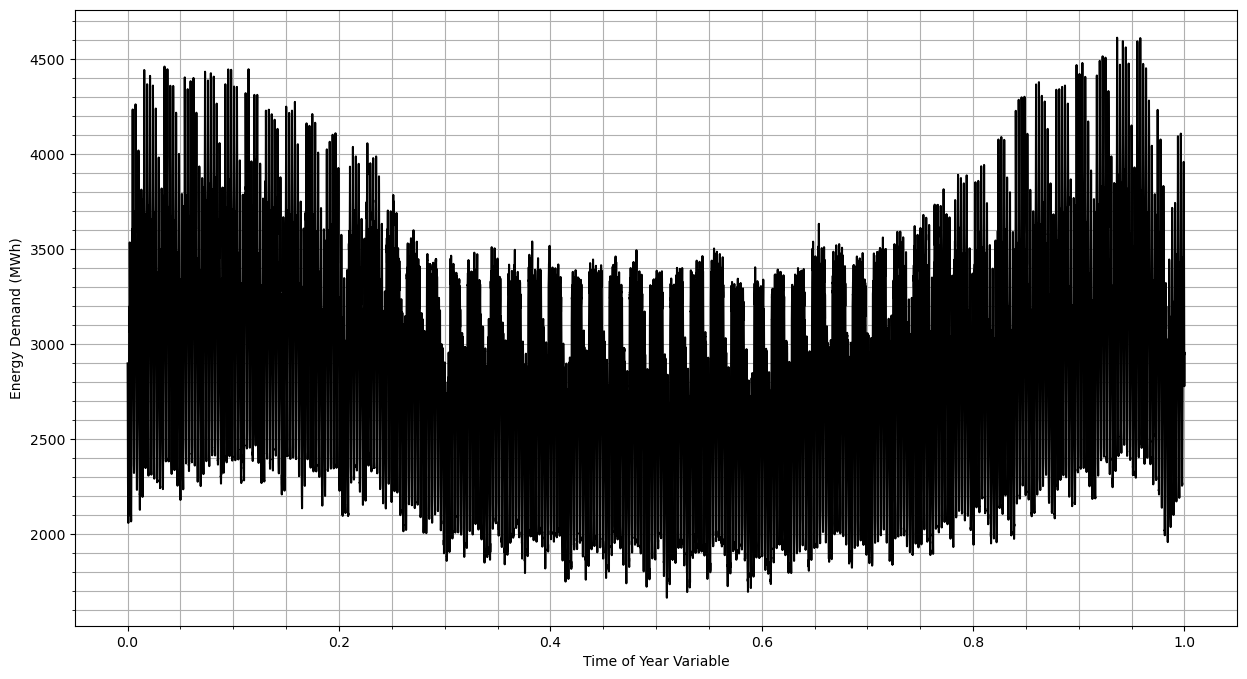

In [30]:
plt.rcParams["font.size"] = 10 # setting font size
plt.figure(figsize=(15, 8)) # setting figure size

plt.plot(demand["Time of Year Variable"], demand["Demand"], color = "black") # plotting demand over time of year variable

plt.xlabel("Time of Year Variable") # setting x-axis name
plt.ylabel("Energy Demand (MWh)") # setting y-axis name

plt.grid(which = "both") # showing both minor and major grids
plt.minorticks_on() # turning on minor ticks on both axes

plt.savefig("question3.png", dpi = 300) # saving figure
plt.show() # showing plot

<h1>Question 4</h1>

In [32]:
# getting month name
demand["Month"] = demand["Datetime"].dt.month_name()
# getting month number for sorting
demand["Month No"] = demand["Datetime"].dt.month

In [33]:
# averaging monthly demand over the year
demand_by_month_mean = demand[["Month", "Month No", "Demand"]].groupby(by = "Month", as_index = False).mean()

In [34]:
# sorting values by month number
demand_by_month_mean = demand_by_month_mean.sort_values(by = "Month No")

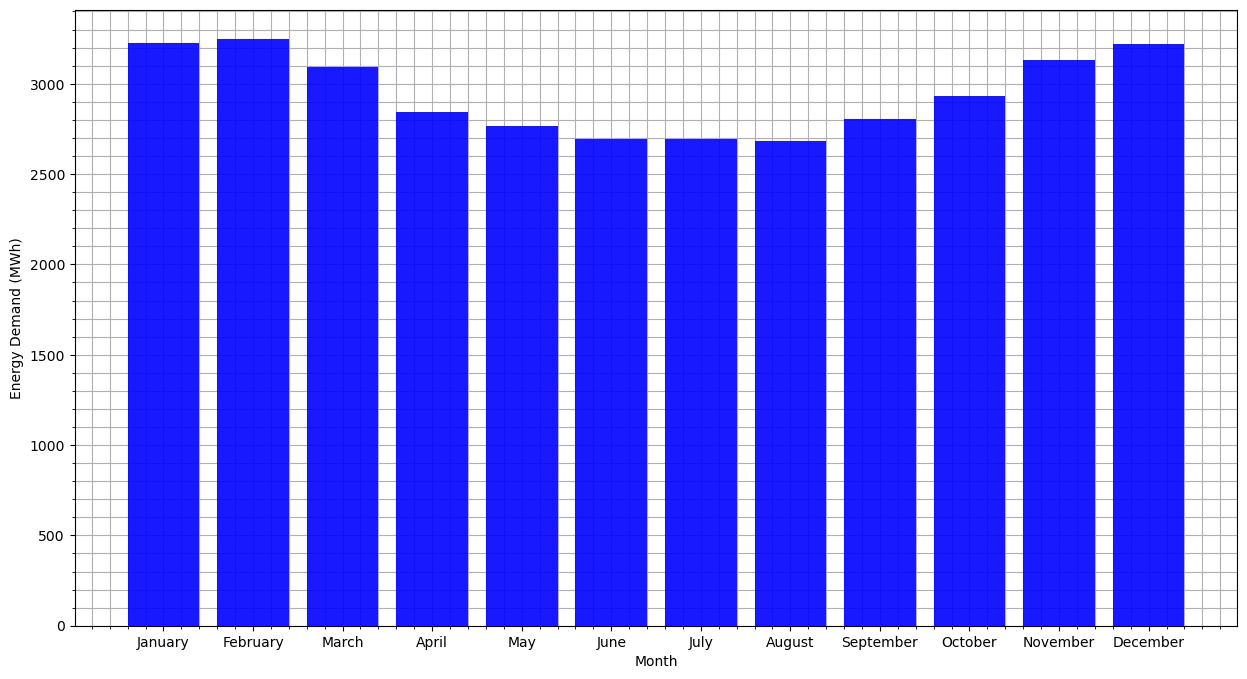

In [35]:
plt.rcParams["font.size"] = 10 # setting font size
plt.figure(figsize=(15, 8)) # setting figure size

# plotting the average demand for each month
plt.bar(x = demand_by_month_mean["Month"], height = demand_by_month_mean["Demand"], zorder = 3, color = "blue", alpha = 0.9)

plt.xlabel("Month") # setting x-axis name
plt.ylabel("Energy Demand (MWh)") # setting y-axis name

plt.grid(which = "both", zorder = 0) # showing both minor and major grids
plt.minorticks_on() # turning minor and major grids on

plt.savefig("question4.png", dpi = 300) # saving figure
plt.show() # showing figure

<h1>Question 5</h1>

In [37]:
demand

,Datetime,Demand,Day of Year,Fraction of Day,Time of Year Variable,Month,Month No
0,2014-01-01 00:00:00,2899.0,1,0.000000,0.000000,January,1
1,2014-01-01 00:15:00,2869.0,1,0.010417,0.000029,January,1
2,2014-01-01 00:30:00,2827.0,1,0.020833,0.000057,January,1
3,2014-01-01 00:45:00,2787.0,1,0.031250,0.000086,January,1
4,2014-01-01 01:00:00,2724.0,1,0.041667,0.000114,January,1
...,...,...,...,...,...,...,...
35035,2014-12-31 22:45:00,2779.0,365,0.947917,0.999857,December,12
35036,2014-12-31 23:00:00,2876.0,365,0.958333,0.999886,December,12
35037,2014-12-31 23:15:00,2961.0,365,0.968750,0.999914,December,12
35038,2014-12-31 23:30:00,2957.0,365,0.979167,0.999943,December,12


In [38]:
demand["Hour of Day"] = demand["Datetime"].dt.hour

In [39]:
demand

,Datetime,Demand,Day of Year,Fraction of Day,Time of Year Variable,Month,Month No,Hour of Day
0,2014-01-01 00:00:00,2899.0,1,0.000000,0.000000,January,1,0
1,2014-01-01 00:15:00,2869.0,1,0.010417,0.000029,January,1,0
2,2014-01-01 00:30:00,2827.0,1,0.020833,0.000057,January,1,0
3,2014-01-01 00:45:00,2787.0,1,0.031250,0.000086,January,1,0
4,2014-01-01 01:00:00,2724.0,1,0.041667,0.000114,January,1,1
...,...,...,...,...,...,...,...,...
35035,2014-12-31 22:45:00,2779.0,365,0.947917,0.999857,December,12,22
35036,2014-12-31 23:00:00,2876.0,365,0.958333,0.999886,December,12,23
35037,2014-12-31 23:15:00,2961.0,365,0.968750,0.999914,December,12,23
35038,2014-12-31 23:30:00,2957.0,365,0.979167,0.999943,December,12,23


In [40]:
# getting hourly demand averages
demand_by_hour_mean = demand[["Hour of Day", "Demand"]].groupby(by = "Hour of Day", as_index = False).mean()

In [41]:
# sorting values by hour of day
demand_by_hour_mean = demand_by_hour_mean.sort_values(by = "Hour of Day")

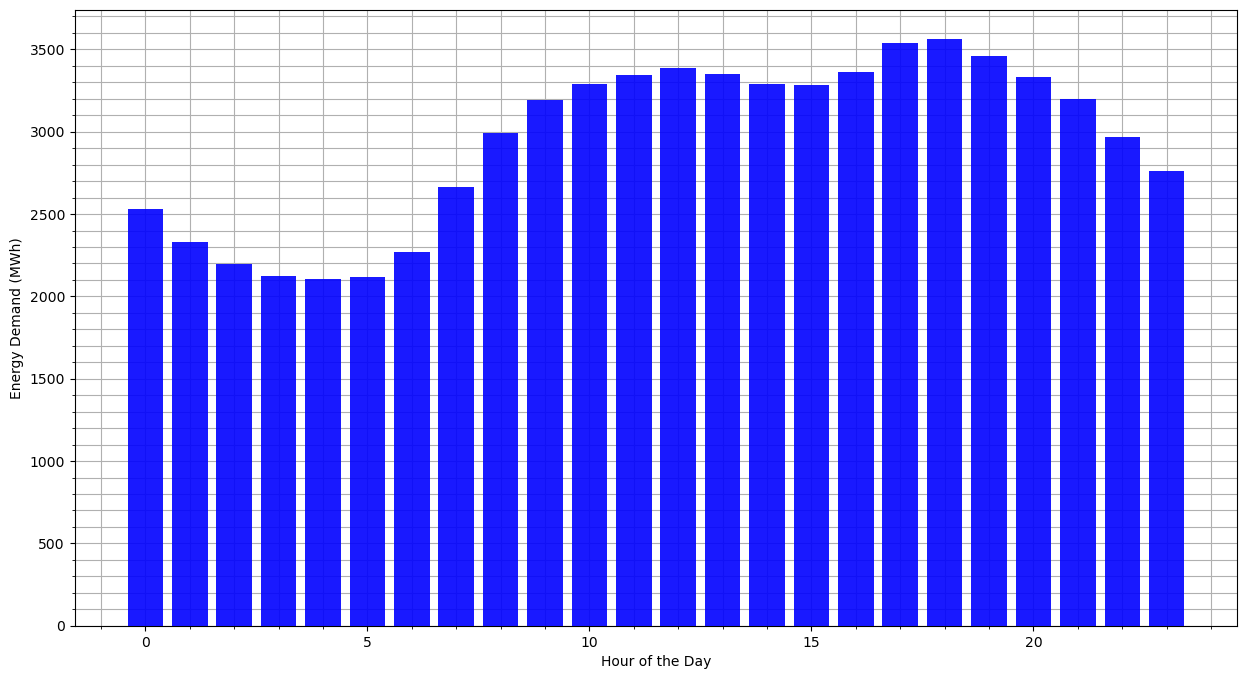

In [42]:
plt.rcParams["font.size"] = 10 # setting font size
plt.figure(figsize=(15, 8)) # setting figure size

# plotting bar graph of hour of day
plt.bar(x = demand_by_hour_mean["Hour of Day"], height = demand_by_hour_mean["Demand"], zorder = 3, color = "blue", alpha = 0.9)

plt.xlabel("Hour of the Day") # setting x-axis name
plt.ylabel("Energy Demand (MWh)") # setting y-axis name

plt.grid(which = "both", zorder = 0) # showing both minor and major grids
plt.minorticks_on() # turning on minor ticks on both axes

plt.savefig("question5.png", dpi = 300) # saving figure
plt.show() # showing figure

<h1>Question 6</h1>

In [44]:
# getting day name from datetime
demand["Day"] = demand["Datetime"].dt.day_name()
# getting day number for sorting
demand["Day No"] = demand["Datetime"].dt.dayofweek

In [45]:
# creating a new dataframe that averages over daily demand
demand_by_day_mean = demand[["Day", "Day No", "Demand"]].groupby(by = "Day", as_index = False).mean()

In [46]:
# sorting by day number
demand_by_day_mean = demand_by_day_mean.sort_values(by = "Day No")

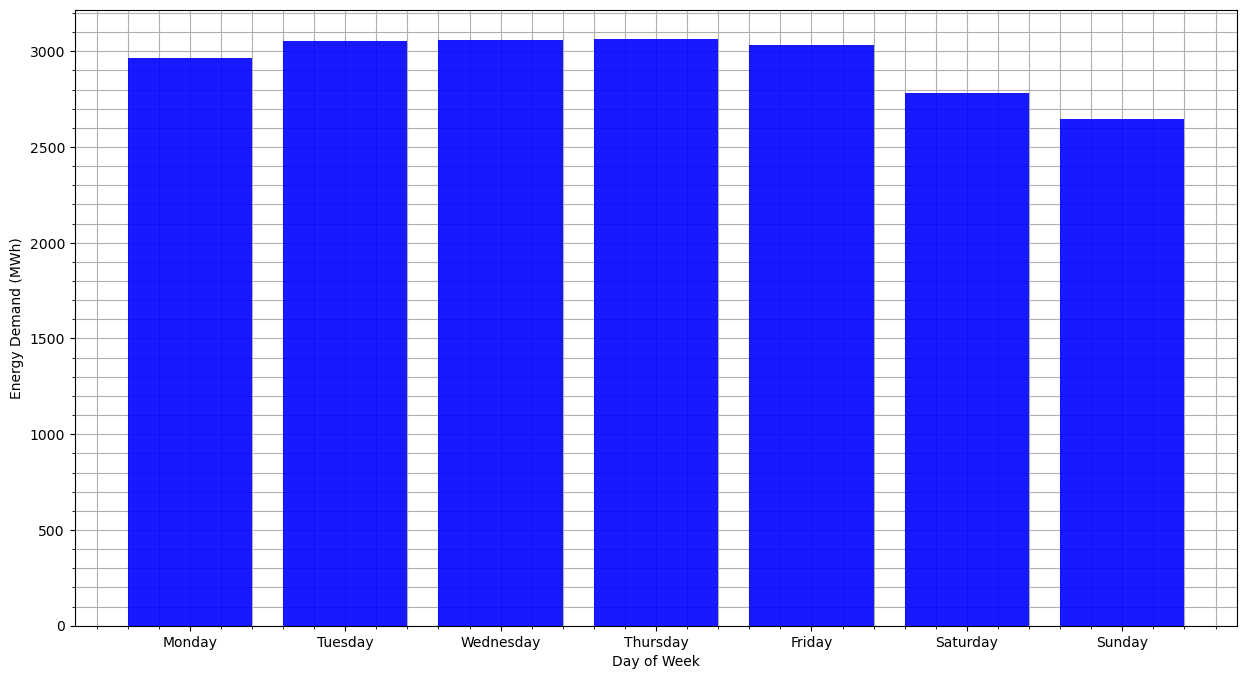

In [47]:
plt.rcParams["font.size"] = 10 # setting font size
plt.figure(figsize=(15, 8)) # setting figure size

# plotting bar graph for daily average
plt.bar(x = demand_by_day_mean["Day"], height = demand_by_day_mean["Demand"], zorder = 3, color = "blue", alpha = 0.9)

plt.xlabel("Day of Week") # setting x-axis name
plt.ylabel("Energy Demand (MWh)") # setting y-axis name

plt.grid(which = "both", zorder = 0) # showing both minor and major grids
plt.minorticks_on() # showing minor ticks on both axes

plt.savefig("question6.png", dpi = 300) # saving figure
plt.show() # showing figure

<h1>Question 7</h1>

In [49]:
demand

,Datetime,Demand,Day of Year,Fraction of Day,Time of Year Variable,Month,Month No,Hour of Day,Day,Day No
0,2014-01-01 00:00:00,2899.0,1,0.000000,0.000000,January,1,0,Wednesday,2
1,2014-01-01 00:15:00,2869.0,1,0.010417,0.000029,January,1,0,Wednesday,2
2,2014-01-01 00:30:00,2827.0,1,0.020833,0.000057,January,1,0,Wednesday,2
3,2014-01-01 00:45:00,2787.0,1,0.031250,0.000086,January,1,0,Wednesday,2
4,2014-01-01 01:00:00,2724.0,1,0.041667,0.000114,January,1,1,Wednesday,2
...,...,...,...,...,...,...,...,...,...,...
35035,2014-12-31 22:45:00,2779.0,365,0.947917,0.999857,December,12,22,Wednesday,2
35036,2014-12-31 23:00:00,2876.0,365,0.958333,0.999886,December,12,23,Wednesday,2
35037,2014-12-31 23:15:00,2961.0,365,0.968750,0.999914,December,12,23,Wednesday,2
35038,2014-12-31 23:30:00,2957.0,365,0.979167,0.999943,December,12,23,Wednesday,2


In [50]:
# creating a daily load profile function so i can loop over each demand curve for daily load by hour
def daily_load_profile(df, day):

    return df[df["Day"] == day][["Hour of Day", "Demand"]].groupby(by = "Hour of Day", as_index = False).mean()

In [51]:
# creating a list of week names
day_of_week = demand_by_day_mean["Day"].unique().tolist()
# initiating an empty load profile list
load_profiles = []

In [52]:
# looping over each day of the week and calling the daily_load_profile function
for day in day_of_week:

    load_profiles.append(daily_load_profile(demand, day))

In [53]:
load_profiles

[    Hour of Day       Demand
 0             0  2391.326923
 1             1  2212.317308
 2             2  2093.615385
 3             3  2032.706731
 4             4  2023.168269
 5             5  2050.812500
 6             6  2245.923077
 7             7  2704.875000
 8             8  3075.024038
 9             9  3267.221154
 10           10  3352.697115
 11           11  3399.557692
 12           12  3439.447115
 13           13  3398.163462
 14           14  3355.485577
 15           15  3374.177885
 16           16  3480.057692
 17           17  3664.567308
 18           18  3664.000000
 19           19  3534.865385
 20           20  3398.610577
 21           21  3263.317308
 22           22  3010.355769
 23           23  2759.081731,
     Hour of Day       Demand
 0             0  2510.788462
 1             1  2318.504808
 2             2  2193.745192
 3             3  2130.639423
 4             4  2121.923077
 5             5  2148.014423
 6             6  2354.802885
 7       

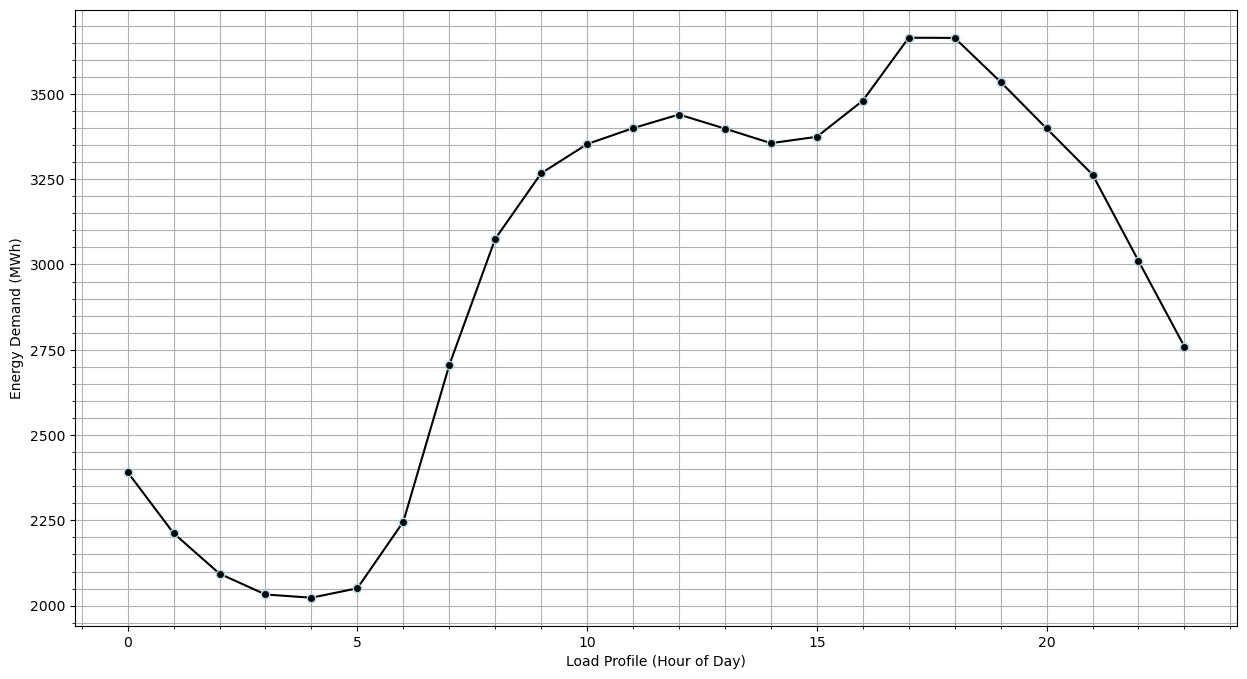

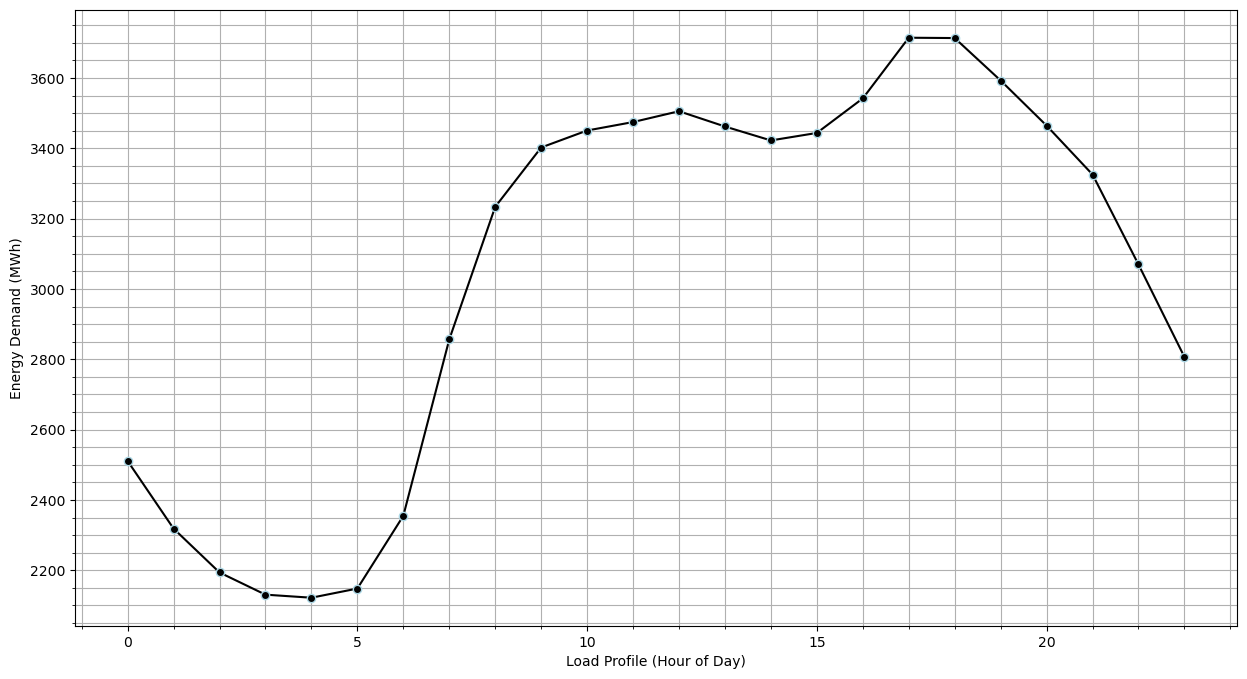

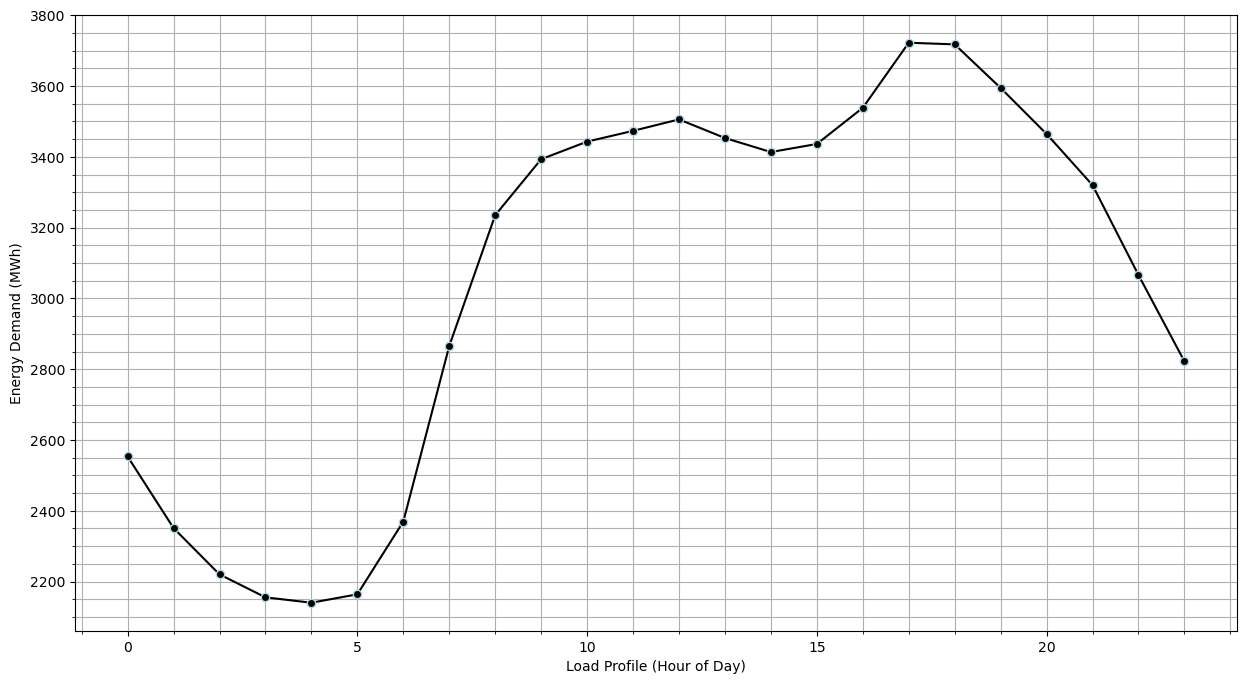

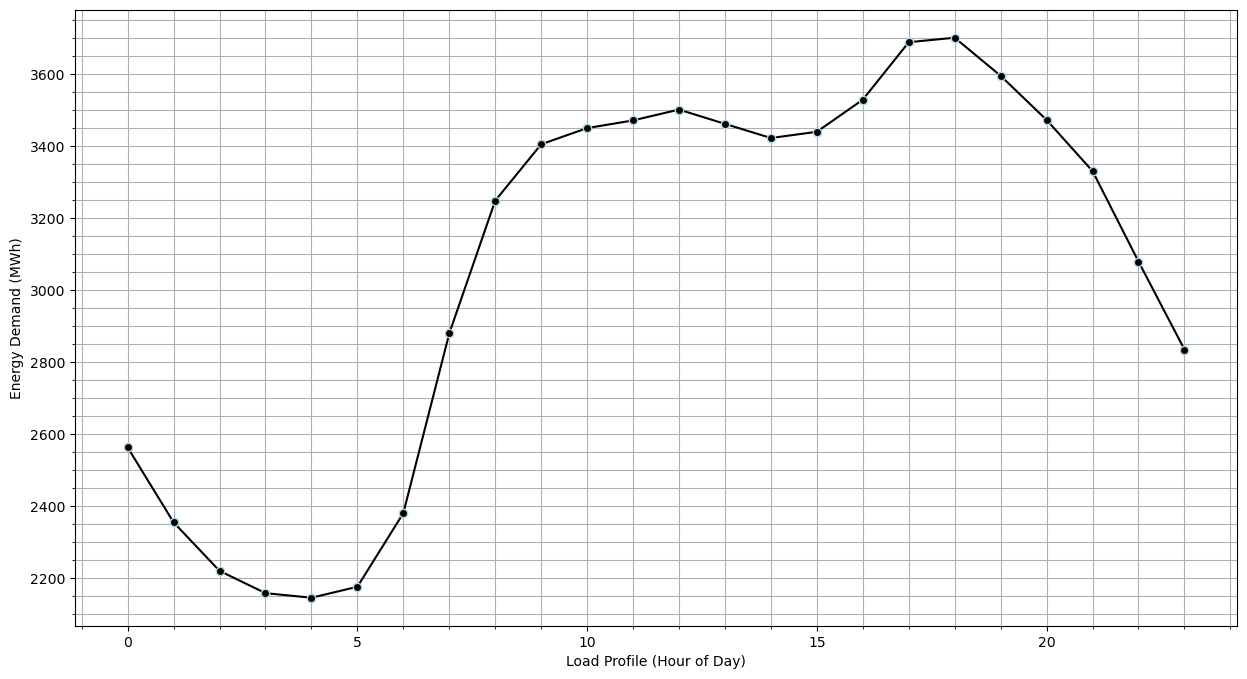

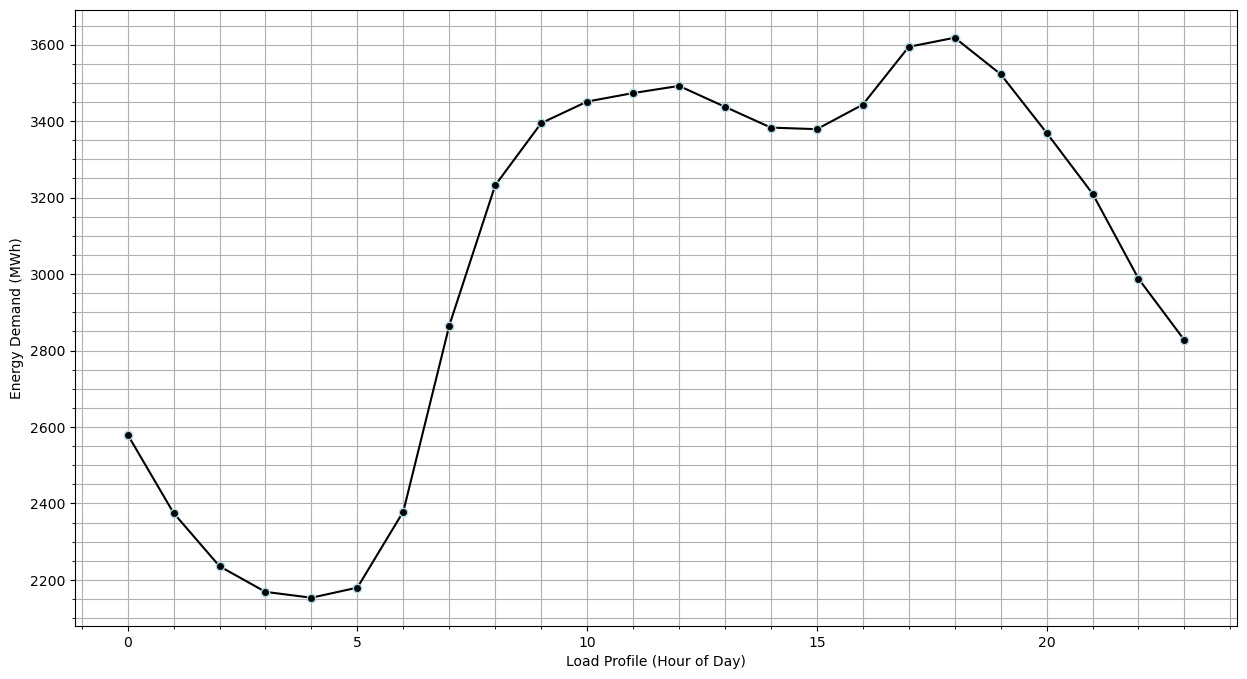

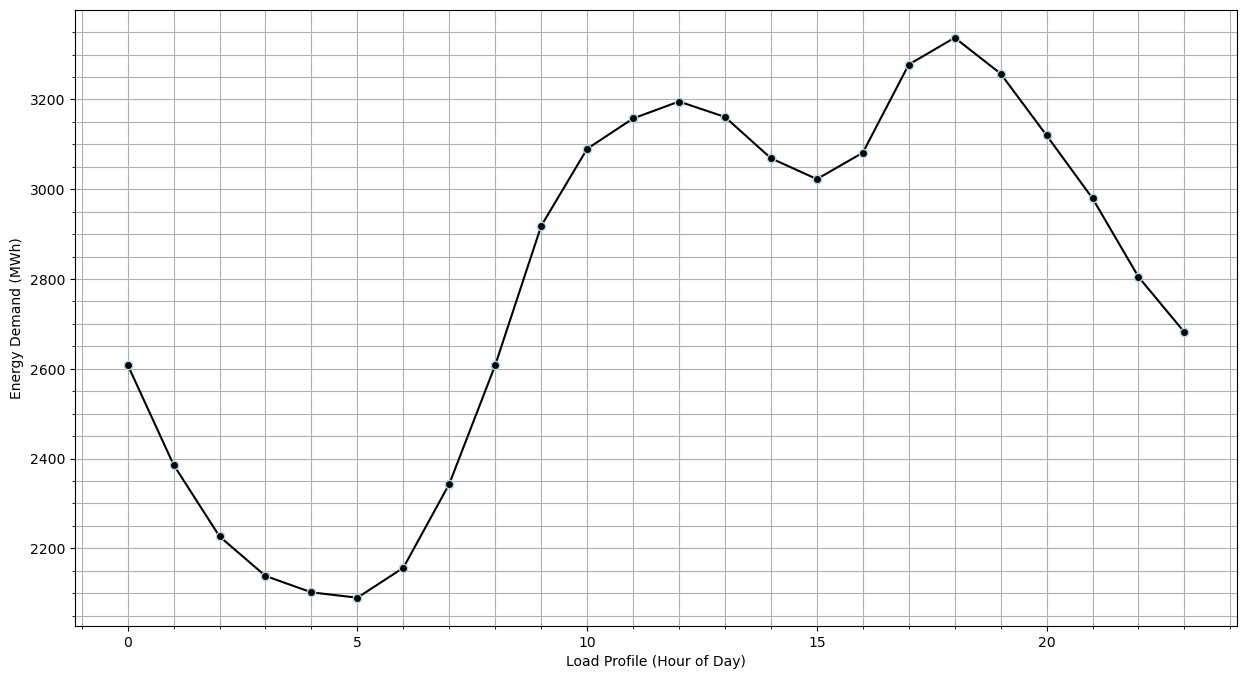

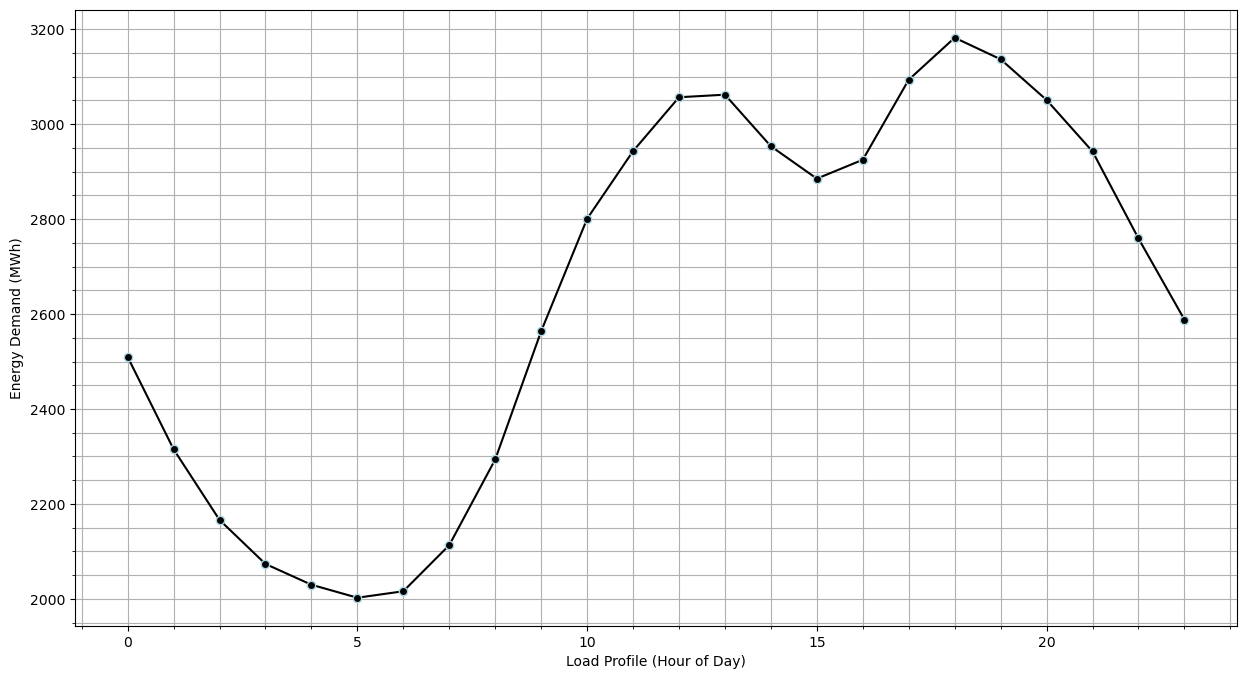

In [54]:
i = 0 # using i to loop over list using i as indexer

# looping over each day of the week and plotting it on separate graphs for exploratory purposes
for day in day_of_week:

    plt.rcParams["font.size"] = 10 # setting font size
    plt.figure(figsize=(15, 8)) # setting figure size
    plt.grid(which = "both", zorder = 0) # setting both major and minor grids
    plt.minorticks_on() # turning on minor ticks on both axes

    plt.plot(load_profiles[i]["Hour of Day"], load_profiles[i]["Demand"], # plotting each hour of day load profile
             zorder = 3, # pushing the graph to the beginning
             color = "black", # setting graph color
             marker = "o", # setting marker
             markersize = 6, # setting marker size
             mec = "lightblue") # setting the marker border color
    
    plt.xlabel("Load Profile (Hour of Day)") # setting x-axis name
    plt.ylabel("Energy Demand (MWh)") # setting y-axis name
    plt.show() # showing figure
    
    i += 1 # incrementing i by 1 to go to the next index

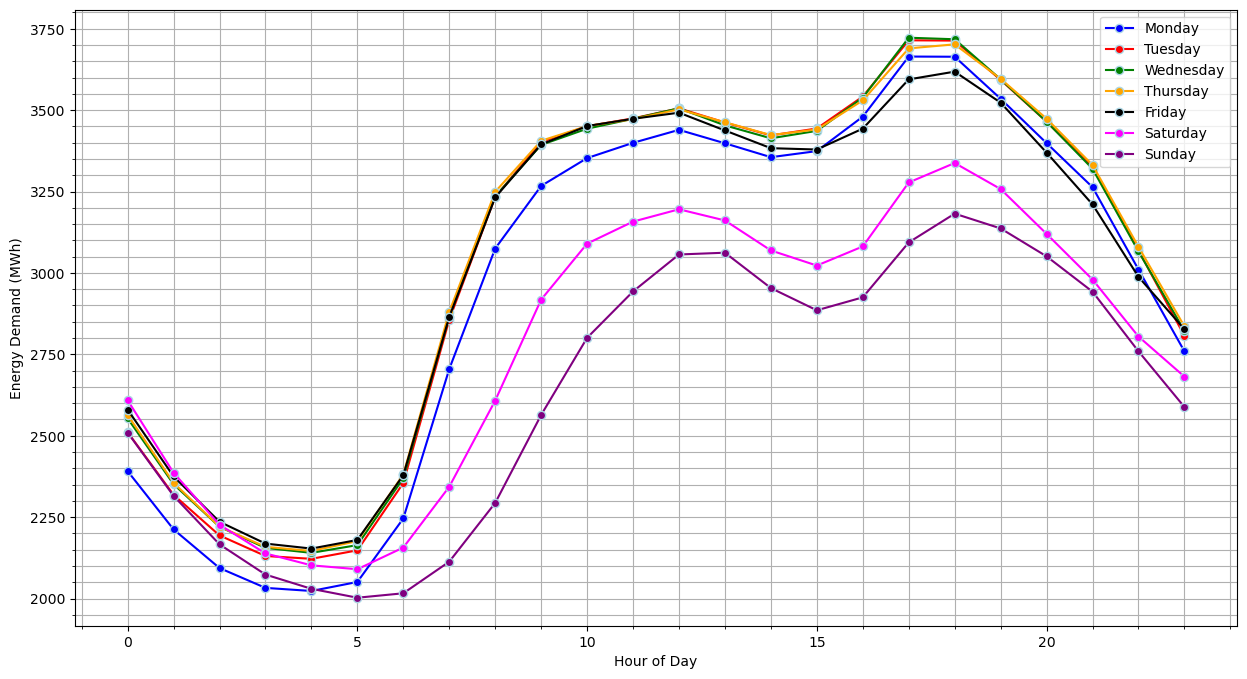

In [55]:
# setting colors for each day of the week
colors = {
    "Monday" : "blue",
    "Tuesday" : "red",
    "Wednesday" : "green",
    "Thursday" : "orange",
    "Friday" : "black",
    "Saturday" : "magenta",
    "Sunday" : "purple"
}

plt.rcParams["font.size"] = 10 # setting font size
plt.figure(figsize=(15, 8)) # setting figure size
plt.grid(which = "both", zorder = 0) # setting both minor and major grids
plt.minorticks_on() # setting minor ticks on both axes

i = 0 # using i to loop over list using i as indexer

for day in day_of_week:

    plt.plot(load_profiles[i]["Hour of Day"], load_profiles[i]["Demand"], # graphing load profiles for each hour of the day for each day
             zorder = 3, # pushing the plots to the front of the figure so that grid shows in the back
             color = colors[day], # getting color from colors dataframe
             marker = "o", # setting marker style
             markersize = 6, # setting marker size
             mec = "lightblue", # setting marker border color
            label = f"{day}") # setting label for each day
    i += 1 # incremening i to go to next index

plt.legend() # showing legend
plt.xlabel("Hour of Day") # setting x-axis name
plt.ylabel("Energy Demand (MWh)") # setting y-axis name

plt.savefig("question8.png", dpi = 300) # saving figure
plt.show() # showing plot

<h1>Question 8</h1>

In [57]:
demand

,Datetime,Demand,Day of Year,Fraction of Day,Time of Year Variable,Month,Month No,Hour of Day,Day,Day No
0,2014-01-01 00:00:00,2899.0,1,0.000000,0.000000,January,1,0,Wednesday,2
1,2014-01-01 00:15:00,2869.0,1,0.010417,0.000029,January,1,0,Wednesday,2
2,2014-01-01 00:30:00,2827.0,1,0.020833,0.000057,January,1,0,Wednesday,2
3,2014-01-01 00:45:00,2787.0,1,0.031250,0.000086,January,1,0,Wednesday,2
4,2014-01-01 01:00:00,2724.0,1,0.041667,0.000114,January,1,1,Wednesday,2
...,...,...,...,...,...,...,...,...,...,...
35035,2014-12-31 22:45:00,2779.0,365,0.947917,0.999857,December,12,22,Wednesday,2
35036,2014-12-31 23:00:00,2876.0,365,0.958333,0.999886,December,12,23,Wednesday,2
35037,2014-12-31 23:15:00,2961.0,365,0.968750,0.999914,December,12,23,Wednesday,2
35038,2014-12-31 23:30:00,2957.0,365,0.979167,0.999943,December,12,23,Wednesday,2


In [58]:
day_of_week

['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [59]:
# initiating empty lists for weekdays and weekends
weekdays = []
weekends = []

# looping over weekdays to get weekdays in one list
for day in day_of_week[0 : 5]:
    
    weekdays.append(day)
    
# looping over weekends to get weekdays in one list
for day in day_of_week[5 : 7]:
    
    weekends.append(day)

In [60]:
weekdays

['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

In [61]:
# filtering demand dataframe to get weekdays ONLY
demand_weekdays = demand[demand["Day"].isin(weekdays)]

In [62]:
# filtering demand dataframe to get weekends ONLY
demand_weekends = demand[demand["Day"].isin(weekends)]

In [63]:
demand_weekdays

,Datetime,Demand,Day of Year,Fraction of Day,Time of Year Variable,Month,Month No,Hour of Day,Day,Day No
0,2014-01-01 00:00:00,2899.0,1,0.000000,0.000000,January,1,0,Wednesday,2
1,2014-01-01 00:15:00,2869.0,1,0.010417,0.000029,January,1,0,Wednesday,2
2,2014-01-01 00:30:00,2827.0,1,0.020833,0.000057,January,1,0,Wednesday,2
3,2014-01-01 00:45:00,2787.0,1,0.031250,0.000086,January,1,0,Wednesday,2
4,2014-01-01 01:00:00,2724.0,1,0.041667,0.000114,January,1,1,Wednesday,2
...,...,...,...,...,...,...,...,...,...,...
35035,2014-12-31 22:45:00,2779.0,365,0.947917,0.999857,December,12,22,Wednesday,2
35036,2014-12-31 23:00:00,2876.0,365,0.958333,0.999886,December,12,23,Wednesday,2
35037,2014-12-31 23:15:00,2961.0,365,0.968750,0.999914,December,12,23,Wednesday,2
35038,2014-12-31 23:30:00,2957.0,365,0.979167,0.999943,December,12,23,Wednesday,2


In [64]:
demand_weekends

,Datetime,Demand,Day of Year,Fraction of Day,Time of Year Variable,Month,Month No,Hour of Day,Day,Day No
288,2014-01-04 00:00:00,3051.0,4,0.000000,0.008219,January,1,0,Saturday,5
289,2014-01-04 00:15:00,2985.0,4,0.010417,0.008248,January,1,0,Saturday,5
290,2014-01-04 00:30:00,2897.0,4,0.020833,0.008276,January,1,0,Saturday,5
291,2014-01-04 00:45:00,2815.0,4,0.031250,0.008305,January,1,0,Saturday,5
292,2014-01-04 01:00:00,2743.0,4,0.041667,0.008333,January,1,1,Saturday,5
...,...,...,...,...,...,...,...,...,...,...
34747,2014-12-28 22:45:00,2996.0,362,0.947917,0.991638,December,12,22,Sunday,6
34748,2014-12-28 23:00:00,3013.0,362,0.958333,0.991667,December,12,23,Sunday,6
34749,2014-12-28 23:15:00,3083.0,362,0.968750,0.991695,December,12,23,Sunday,6
34750,2014-12-28 23:30:00,3050.0,362,0.979167,0.991724,December,12,23,Sunday,6


In [65]:
# performing t_test on weekday vs weekend energy difference to identify statistical significance
stats.ttest_ind(demand_weekends["Demand"], demand_weekdays["Demand"])

TtestResult(statistic=-46.54684714308395, pvalue=0.0, df=35038.0)

<h1>Question 9</h1>

In [67]:
# defining persistence formula for both questions 9 and 10
# variables are the dataframe, the column of interest, and the method for calculating model accuracy
def persistence(df, column, method = "MAE"):

    df['Datetime'] = pd.to_datetime(df['Datetime']) # taking dataframe and ensure column is in datetime format
    df = df.sort_values(by='Datetime').reset_index(drop=True) # ensure values are sorted from beginning to end of year
    
    n = len(df) # getting length of dataframe
    train = df.iloc[:n//2] # selecting first half for training
    test = df.iloc[n//2:].reset_index(drop=True) # selecting second half for testing
    
    # extract demand data
    train_demand = train[column].values
    test_demand = test[column].values
    
    # define maximum forecast horizon (96 steps = 1 day ahead with 15-min intervals)
    max_horizon = 96

    if method == "MAE":
        
        mae_values = []
    
        for k in range(1, max_horizon + 1):
            
            y_hat = test_demand[:-k] # persistence forecast y_hat(t+k) = y(t)
            
            y_actual = test_demand[k:] # actual demand values
        
            # compute Mean Absolute Error (MAE)
            mae = np.mean(np.abs(y_hat - y_actual))
            mae_values.append(mae)

        plt.figure(figsize=(15, 8))
        plt.plot(range(1, max_horizon + 1), mae_values, marker='o', linestyle='-', color = "black", mec = "lightblue", markersize = 8)
        plt.xlabel('Forecast Horizon (steps)')
        plt.ylabel('Mean Absolute Error (MAE)')
        plt.grid(True)
        plt.savefig("question9.png", dpi = 300)
        plt.show()
    
    elif method == "MAPE":

        mape_values = []

        for k in range(1, max_horizon + 1):
            
            y_hat = test_demand[:-k] # persistence forecast y_hat(t+k) = y(t)
            
            y_actual = test_demand[k:] # actual demand values
        
            # Compute Mean Absolute Percent Error (MAPE)
            mape = np.mean(np.abs((y_hat - y_actual) / y_actual)) * 100
            mape_values.append(mape)

        plt.figure(figsize=(15, 8))
        plt.plot(range(1, max_horizon + 1), mape_values, marker='o', linestyle='-', color = "black", mec = "lightblue", markersize = 8)
        plt.xlabel('Forecast Horizon (steps)')
        plt.ylabel('Mean Absolute Error (MAPE)')
        plt.grid(True)
        
        plt.savefig("question10.png", dpi = 300)
        plt.show()

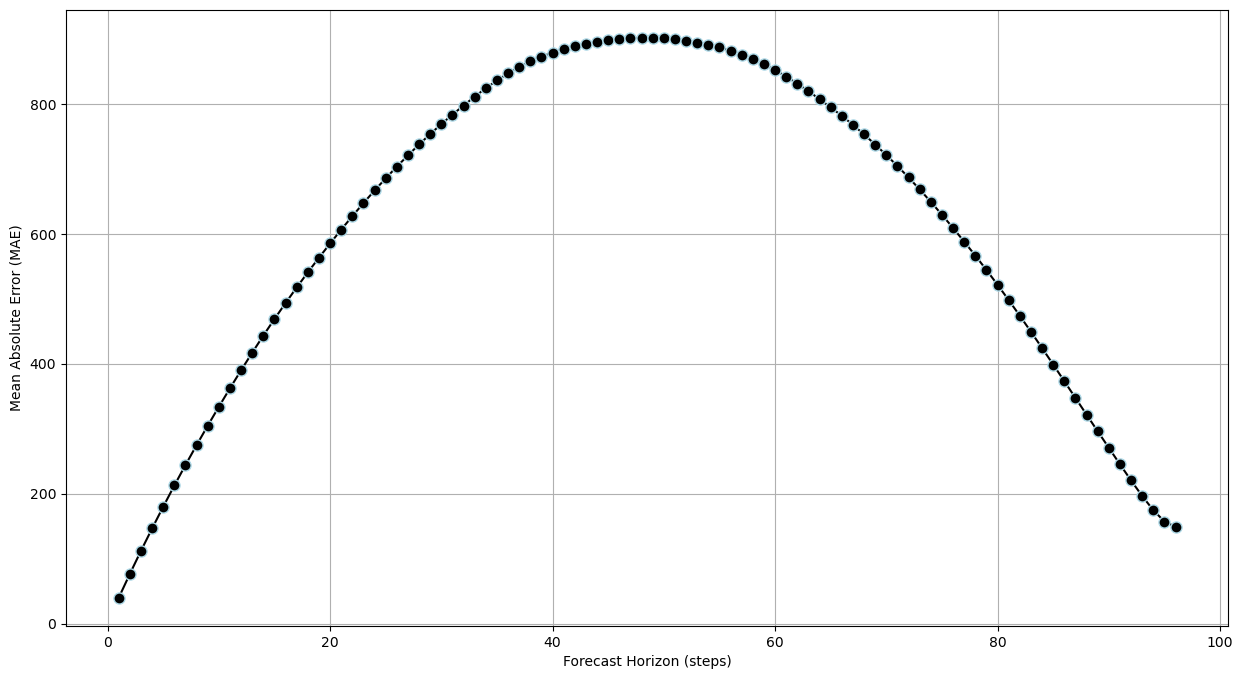

In [68]:
persistence(demand, "Demand", method = "MAE")

<h1>Question 10</h1>

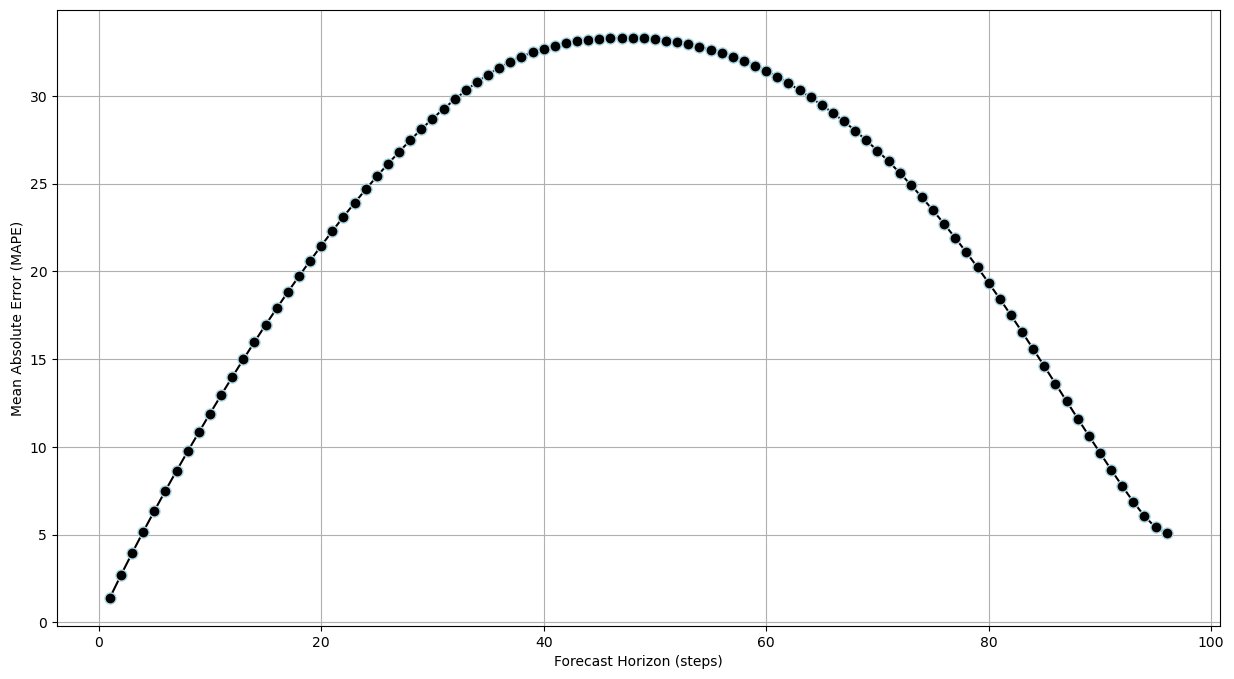

In [70]:
persistence(demand, "Demand", method = "MAPE")